In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
def get_cmap(n=20):
    cmap = plt.get_cmap('hsv')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    return colors

In [3]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00113.csv")
geo_stats_2 = pd.read_csv("corona_city_table_ver_0072.csv")
geo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0027.csv")


recover_data = pd.read_excel("corona_recovered_ver_00115.xlsx")
hospital_data = pd.read_csv("corona_hospitalization_ver_00223.csv")
dead_data = pd.read_csv("corona_deceased_ver_0091.csv")

age_gender_test_data = pd.read_csv("corona_age_and_gender_ver_0090.csv")
young_test_data = pd.read_excel("young_population_weekly_ver_0035.xlsx")

In [56]:
geo_for_vacc = geo_stats[['date','accumulated_cases', 'accumulated_recoveries','accumulated_hospitalized',
                              'accumulated_deaths', 'accumulated_diagnostic_tests', 
                               'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']]


In [ ]:
geo_for_vacc

In [ ]:
vaccinations_data = geo_for_vacc.groupby('date').agg(
    {'accumulated_cases':'sum',
     'accumulated_recoveries':'sum',
     'accumulated_hospitalized':'sum',
     'accumulated_diagnostic_tests':'sum',
    'accumulated_deaths':'sum',
     'accumulated_vaccination_first_dose':'sum',
     'accumulated_vaccination_second_dose':'sum'
    })

In [54]:
vaccinations_data

,accumulated_cases,accumulated_recoveries,accumulated_hospitalized,accumulated_diagnostic_tests,accumulated_deaths,accumulated_vaccination_first_dose,accumulated_vaccination_second_dose
date,,,,,,,
2020-03-11,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,00<15<1500000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
2020-03-12,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,00<15<150000<15000<150<1500000000000000<150000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
2020-03-13,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0<15<15<150<15<15<15<15<150<15<150<150<150<150...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
2020-03-14,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0<15<15<150<15<15<15<15<15<15<15<150<150<150<1...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
2020-03-15,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0<15<15<150<15<15<15<15<15<15<15<15<15<150<150...,0000000000000000000000000000000000000000000000...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
...,...,...,...,...,...,...,...
2021-03-17,1457343732622564409431462516242305194356176290...,1377173472532414239121399496233293193342161279...,<1534.0<15<15<15<15<1518.0<15<1519.0<1518.021....,4361232258861577944755221826022991695755253533...,0<15<15<150<150<15<15<15<1500<15<15<15<15<15<1...,1899.010052.02645.01859.01315.01196.01613.0549...,1735.09387.02238.01580.01093.0969.01260.04647....
2021-03-18,1457363742622564409431464516242305194356176290...,1377193582542424249151418502235294194346161279...,<1534.0<15<15<15<15<1518.0<15<1519.0<1518.021....,4385233398910580644895233828023068697455473546...,0<15<15<150<150<15<15<15<1500<15<15<15<15<15<1...,1903.010066.02656.01871.01330.01205.01627.0552...,1765.09440.02277.01607.01120.0988.01293.04724....
2021-03-19,1457373742622564409431470519242305194357176291...,1387193612562434249201430505237297194347162279...,<1534.0<15<15<15<15<1518.0<15<1519.0<1518.021....,4429234928942582845015251829923122698755763553...,0<15<15<150<150<15<15<15<1500<15<15<15<15<15<1...,1904.010067.02658.01873.01331.01208.01628.0553...,1766.09454.02289.01616.01125.0993.01299.04759....


In [4]:
# change names in data from hebrew to english:
hospital_data_columns_english = ['date', 'num_hospitalizations', 'percentage_women_hospilizations', 'mean_age_hospilizations', 'variance_age_hospilizations', 
                                'num_ventilizations', 'percentage_women_ventilizations','mean_age_ventilizations', 'variance_age_ventilizations',
                                'easy_cases', 'percentage_women_easy_cases', 'mean_age_easy_cases', 'variance_age_easy_cases',
                                'medium_severity', 'percentage_women_medium_severity', 'mean_age_medium_severity', 'variance_age_medium_severity',
                                'severe_cases', 'percentage_women_severe_cases', 'mean_age_severe_cases', 'variance_age_severe_cases', 'cumulative_severe_cases']
column_names_to_english = {k:v for k,v in zip(hospital_data.columns, hospital_data_columns_english)}
hospital_data = hospital_data.rename(columns = column_names_to_english)

In [5]:
hospital_data['date'] = pd.to_datetime(hospital_data['date'],format='%Y-%m-%d')

In [6]:
# mean_age = hospital_data['mean_age_severe_cases']
# plt.plot(hospital_data['date'], mean_age, marker='*')
# plt.grid()

In [7]:
# change names of male, female and unknown to numbers
gender_name_replace = {'זכר' : 0, 
                       'נקבה': 1,
                       'לא ידוע' : -1}
age_gender_test_data['gender'] = age_gender_test_data['gender'].replace(to_replace = gender_name_replace)

In [8]:
# changing all values that say <15 to 7 which is the mean value
age_gender_test_data = age_gender_test_data.replace(to_replace={'<15': 1,
                                                               '80+': '80-100'})
young_test_data = young_test_data.replace(to_replace={'<15': 1})
age_gender_test_data = age_gender_test_data.dropna()

In [9]:
# split ages with - and make two columns
age_gender_test_data[['min_age', 'max_age']] =age_gender_test_data['age_group'].str.split('-',expand=True)
young_test_data[['min_age', 'max_age']] =young_test_data['age_group'].str.split('-',expand=True)

In [10]:
# change date format to datetime and add column of weeks from
age_gender_test_data['first_week_day'] = pd.to_datetime(age_gender_test_data['first_week_day'],format='%Y-%m-%d')
age_gender_test_data['last_week_day'] = pd.to_datetime(age_gender_test_data['last_week_day'],format='%Y-%m-%d')
young_test_data['first_week_day'] = pd.to_datetime(young_test_data['first_week_day'],format='%Y-%m-%d')
young_test_data['last_week_day'] = pd.to_datetime(young_test_data['last_week_day'],format='%Y-%m-%d')

In [11]:
# change dtype of float columns from object to float
age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']] = age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']].astype(float)
young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']] = young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']].astype(float)

In [12]:
# make a column which is the weeks from the beginning of the pandemic
age_gender_test_data['weeks_from'] = np.round((age_gender_test_data['last_week_day'] - age_gender_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)
young_test_data['weeks_from'] = np.round((young_test_data['last_week_day'] - young_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)

In [13]:
# keep only relevant columns
columns_age_gender = ['weeks_from', 'min_age', 'max_age', 'gender', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']
age_gender_test_data = age_gender_test_data[columns_age_gender]

In [14]:
# remove gender information
age_gender_test_data = age_gender_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'gender':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_deceased':'sum'})
young_test_data = young_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'region':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_newly_tested': 'sum'})
young_test_data = young_test_data.drop(columns='region')

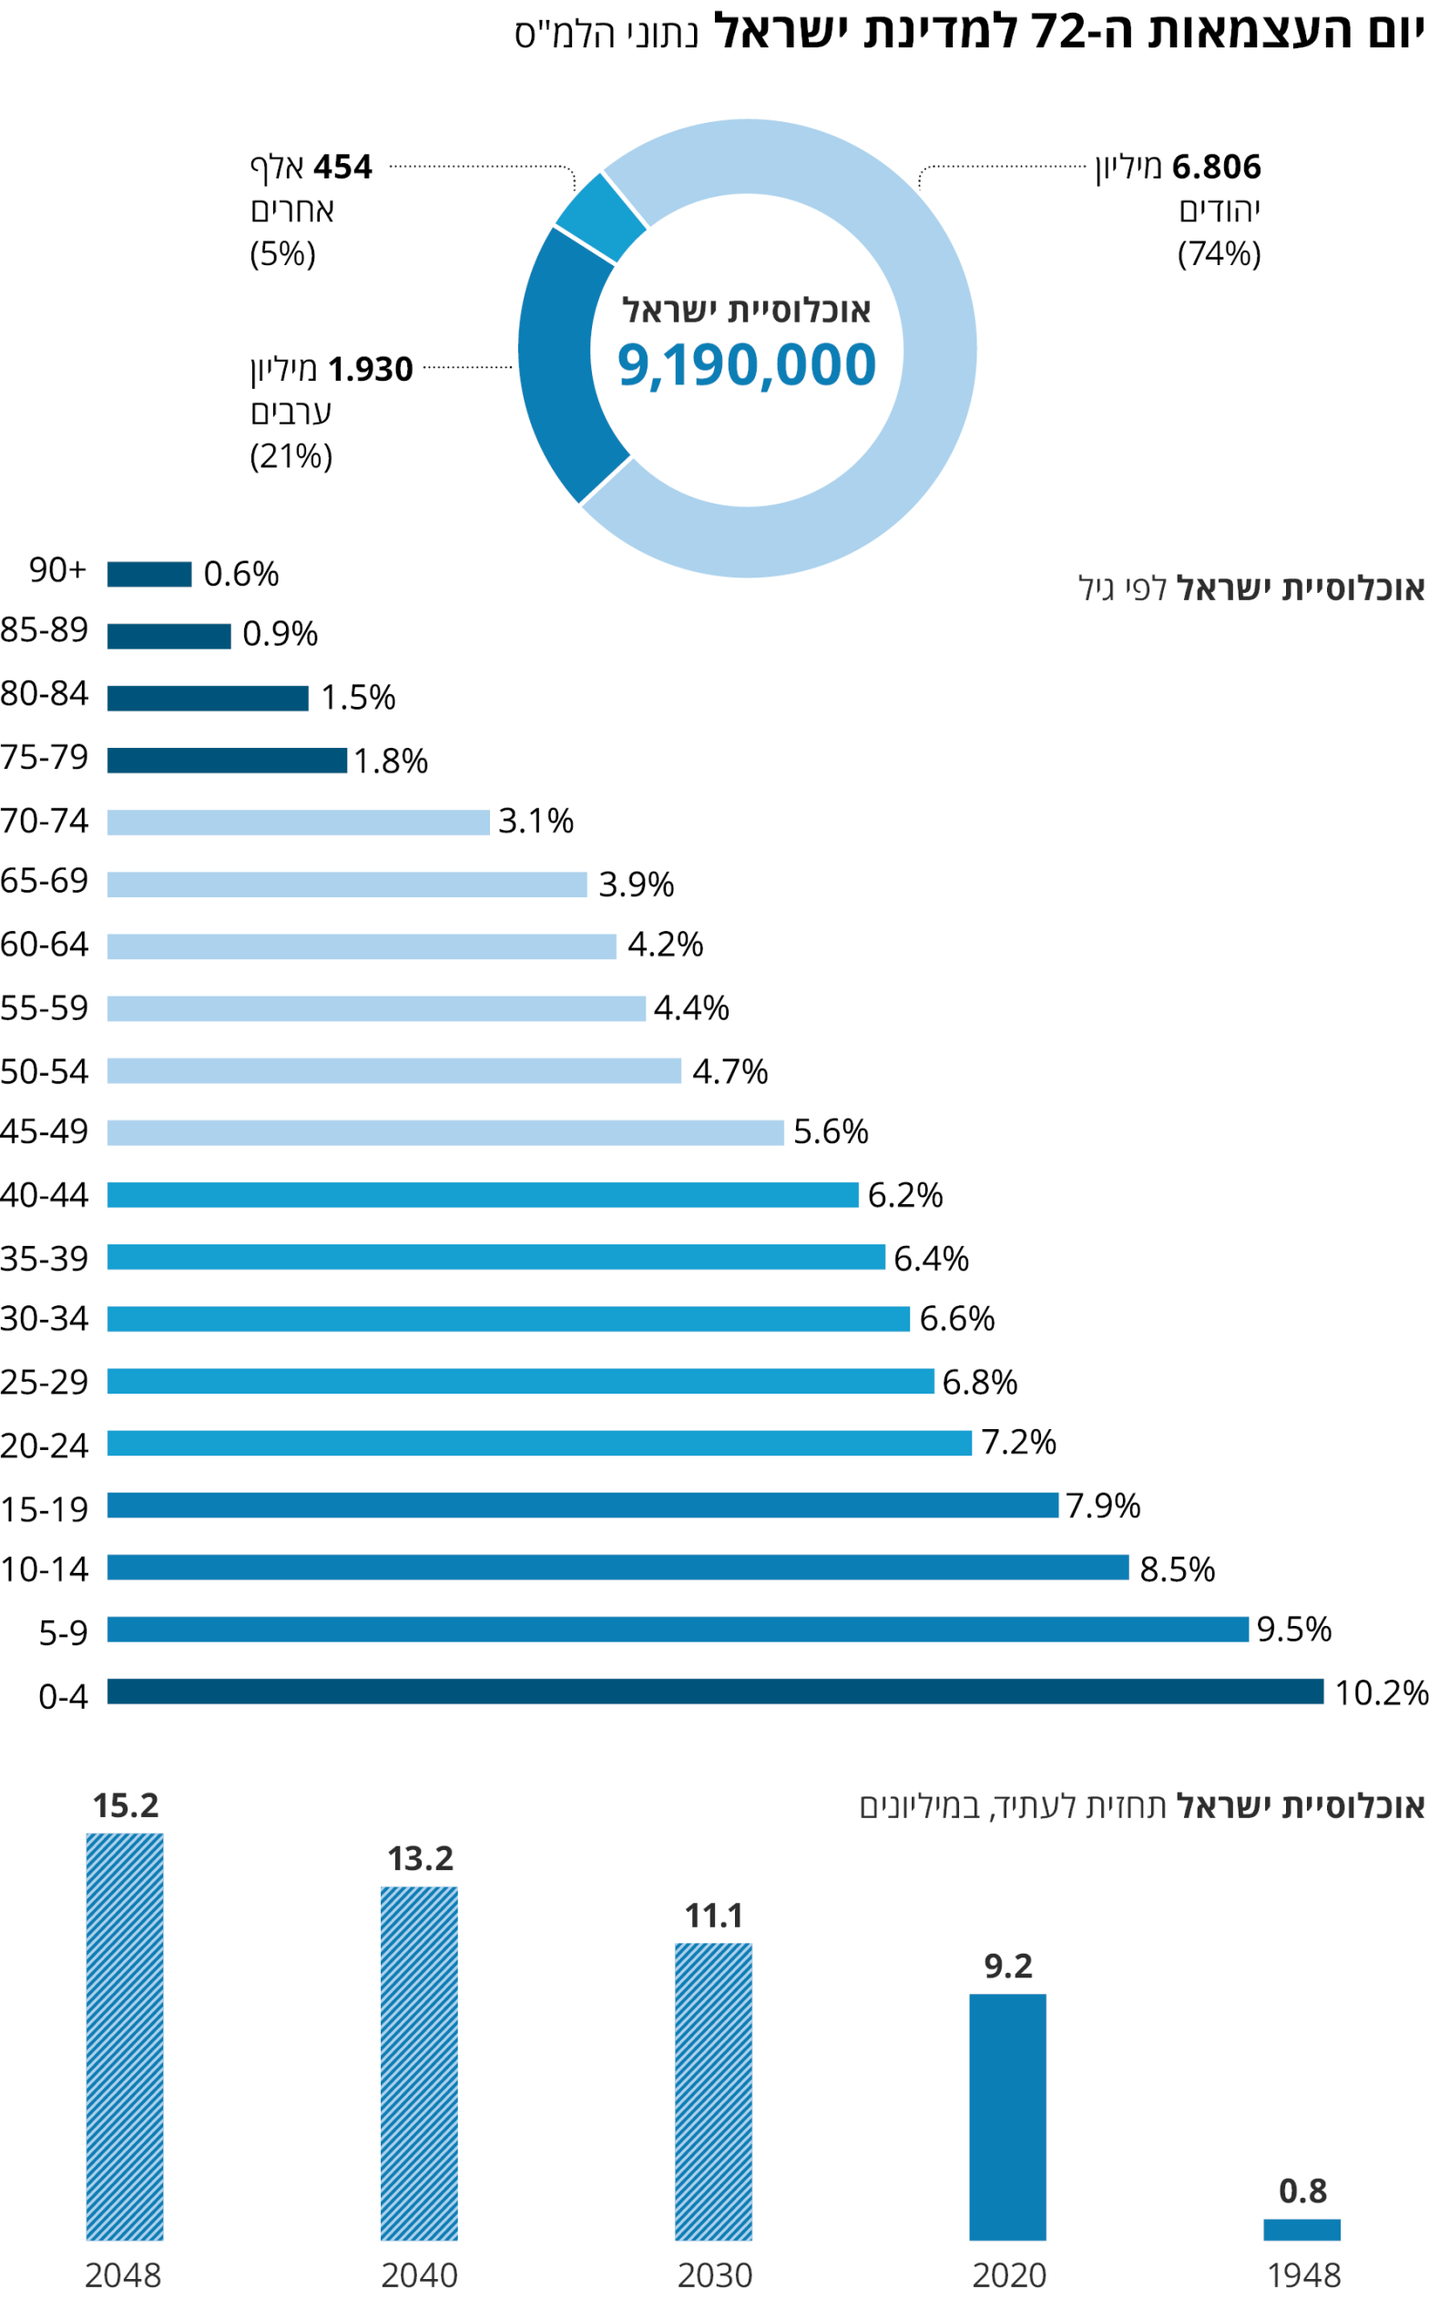

In [15]:
total_population = 9.2 * 10**6

In [16]:
# add data about amount in population - young table
percentage_in_population_young = {4: 10.2,
                           9: 9.5,
                           14:8.5,
                           19: 7.9}
percentage_in_population_young2 = {2: 7,
                           5: 6,
                           8:6,
                           11: 5,
                            14:5,
                            17:4,
                            20:4}
num_in_population_young = {k: v * total_population / 100 for (k, v) in percentage_in_population_young2.items()}
age_info_in_population_young = {'max_age': list(percentage_in_population_young2.keys()),
                         'percentage_age': list(percentage_in_population_young2.values()),
                         'total_age_in_population': list(num_in_population_young.values())}
age_info_in_population_young_df = pd.DataFrame.from_dict(age_info_in_population_young)

In [17]:
# add data about amount in population - older ages
percentage_in_population = {19: 36.1,
                           24:7.2,
                           29:6.8,
                           34: 6.6,
                           39:6.4,
                           44:6.2,
                           49:5.6,
                           54:4.7,
                           59:4.4,
                           64:4.2,
                           69:3.9,
                           74:3.1,
                           79:1.8,
                           100:3}
num_in_population = {k: v * total_population / 100 for (k, v) in percentage_in_population.items()}
age_info_in_population = {'max_age': list(percentage_in_population.keys()),
                         'percentage_age': list(percentage_in_population.values()),
                         'total_age_in_population': list(num_in_population.values())}
age_info_in_population_df = pd.DataFrame.from_dict(age_info_in_population)

In [18]:
# merge population data with covid data for both tables
age_gender_test_data = pd.merge(age_info_in_population_df, age_gender_test_data, how='right', on='max_age')
young_test_data = pd.merge(age_info_in_population_young_df, young_test_data, how='right', on='max_age')

In [19]:
# create aggregated table of total number of cases for each week
test_data_agg_weeks = age_gender_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_deceased':'sum',
                                                                                      'weekly_cases':'sum'})
test_data_young_agg_weeks = young_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_newly_tested':'sum',
                                                                                       'weekly_cases':'sum'})

## draw results for older data 

In [39]:
def draw_per_total(table_per_age, total_table, with_dead = True, with_new = False, seperate_tables = False):
    colors = get_cmap(n=40)
    if not seperate_tables:
        if with_dead or with_new:
            fig, ax = plt.subplots(3, 1)
        else:
            fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(table_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_total_pos = np.array(total_table['weekly_cases'])
        n_total_tests = np.array(total_table['weekly_tests_num'])
        if seperate_tables:
            if (with_dead or with_new):
                fig, ax = plt.subplots(3, 1)
            else:
                fig, ax = plt.subplots(2, 1)
        if with_dead:
            n_total_dec = np.array(total_table['weekly_deceased'])
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_total_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('Percentange of dead per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            n_total_new = np.array(test_data_young_agg_weeks['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_total_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('Percentange of new tests per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        percentage_in_population = df_a.percentage_age.unique().item()
        ax[0].plot(n_weeks, 100 * n_pos / n_total_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[0].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        ax[1].plot(n_weeks, 100 * n_tests / n_total_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[1].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        if seperate_tables:
            ax[0].legend()
            ax[1].legend()
            ax[0].grid()
            ax[1].grid()
            ax[0].set_title('Percentange of positive cases per age')
            ax[1].set_title('Percentange of tests per age')
            ax[0].set_ylabel('Percentage of positive cases from total cases')
            if with_dead or with_new:
                ax[2].legend()
                ax[2].grid()
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Percentange of positive cases per age')
    ax[1].set_title('Percentange of tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
    return fig, ax

In [40]:
def draw_per_population(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [73]:
def draw_per_max(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        max_pos = np.max(n_pos)
        max_tests = np.max(n_tests)
        ax[0].plot(n_weeks, 100 * n_pos / max_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / max_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            max_dec = np.max(n_dec)
            ax[2].plot(n_weeks, 100 * n_dec / max_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            max_new = np.max(n_new)
            ax[2].plot(n_weeks, 100 * n_new / max_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/max new per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/max positive cases per age ')
    ax[1].set_title('number of tests/max tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [41]:
def draw_absolute_numbers(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new , color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases per age ')
    ax[1].set_title('number of tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Positive cases/population per age '}, ylabel='Percentage of positive cases from total cases'>,
        <AxesSubplot:title={'center':'number of tests/population per age'}>],
       dtype=object))

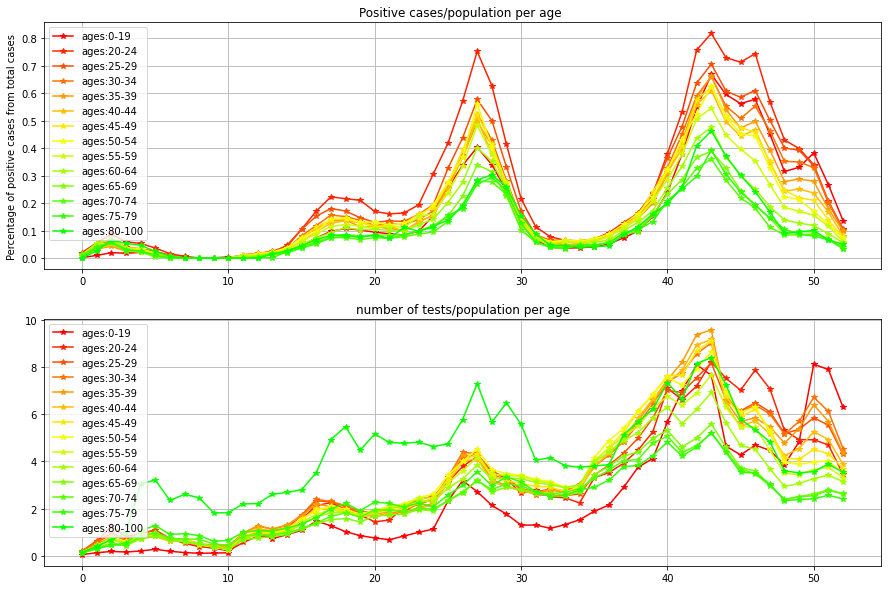

In [61]:
draw_per_population(age_gender_test_data, with_dead=False, with_new=False)

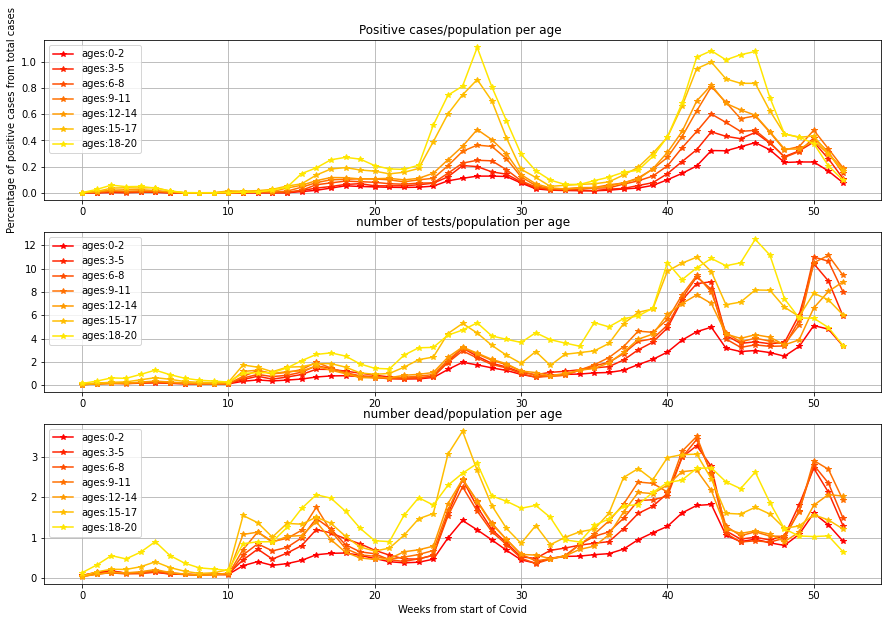

In [24]:
draw_per_population(young_test_data, with_dead=False, with_new=True)

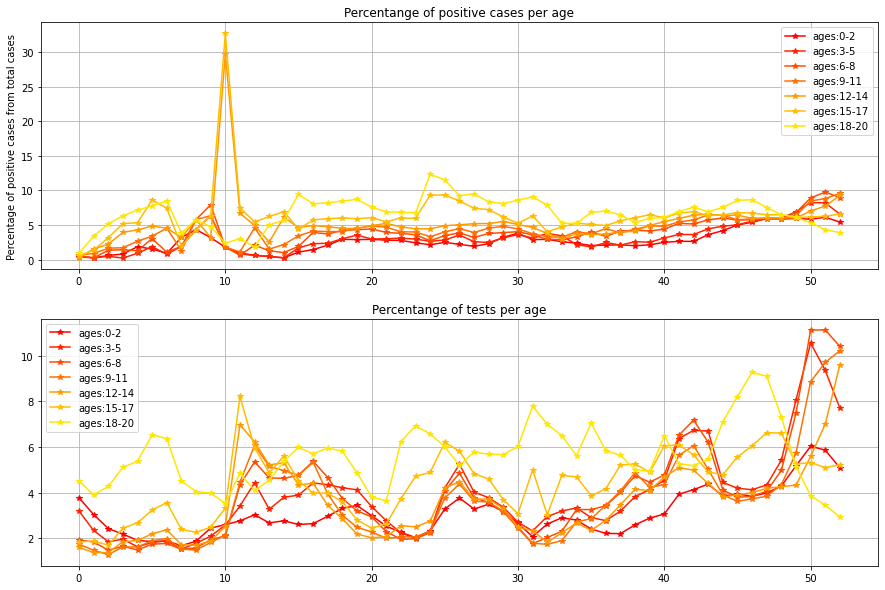

In [25]:
draw_per_total(young_test_data, test_data_agg_weeks, with_dead=False, with_new=False)

## combine all ages into one table

In [26]:
age_gender_test_data_temp = age_gender_test_data[age_gender_test_data.max_age != 19]
all_testing_data = pd.concat([young_test_data, age_gender_test_data_temp]).drop(columns=['gender', 'weekly_deceased', 'weekly_newly_tested'])

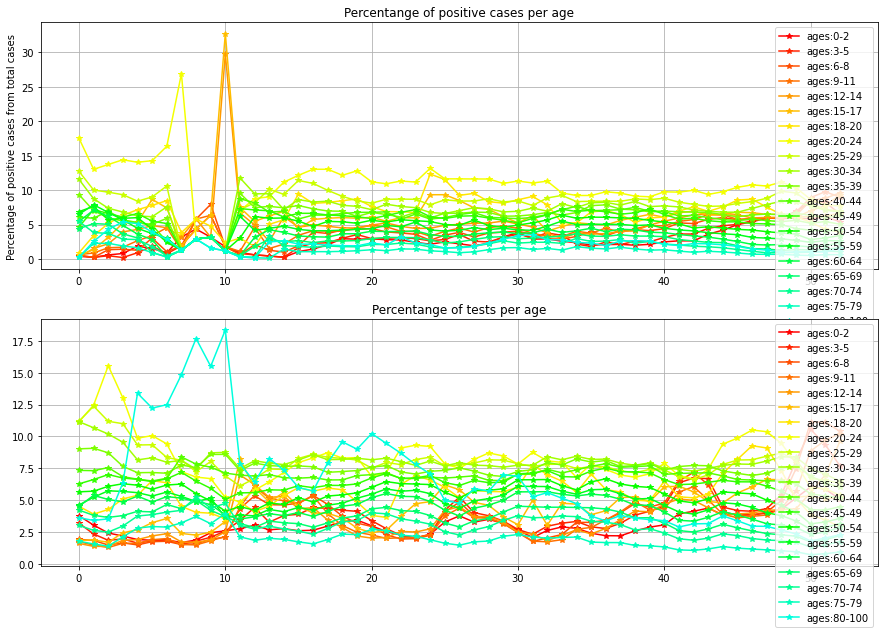

In [27]:
draw_per_total(all_testing_data, test_data_agg_weeks, with_dead=False, with_new=False)

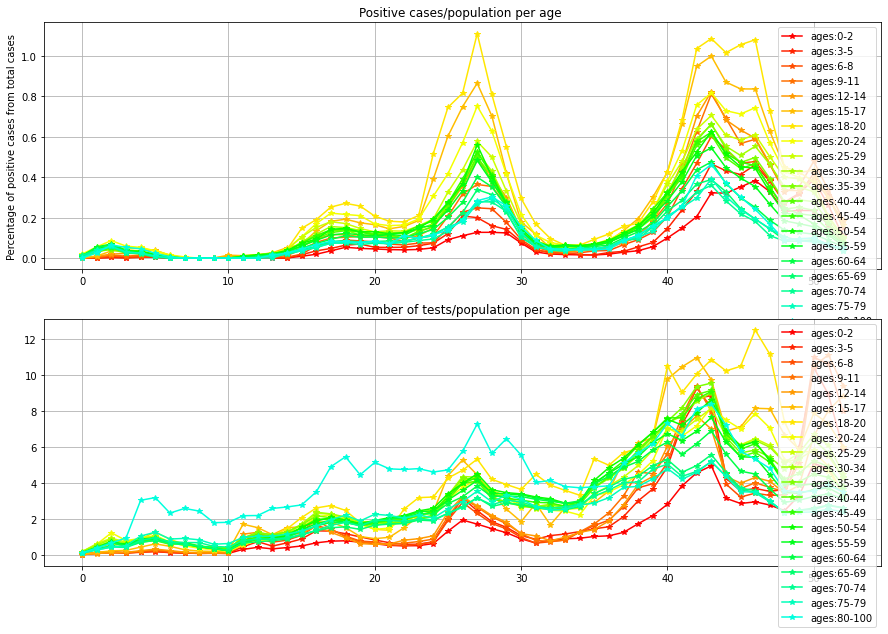

In [28]:
draw_per_population(all_testing_data, with_dead=False, with_new=False)

In [29]:
young_data_tot = young_test_data[young_test_data.max_age != 20]

In [30]:
young_data_tot = young_data_tot.groupby('weeks_from', as_index=False).agg({'max_age': 'last', 
                                        'percentage_age':'sum',
                                        'total_age_in_population': 'sum',
                                        'min_age':'first',
                                        'weekly_tests_num':'sum',
                                        'weekly_cases':'sum',
                                        'weekly_newly_tested':'sum'})

(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Percentange of positive cases per age'}, ylabel='Percentage of positive cases from total cases'>,
        <AxesSubplot:title={'center':'Percentange of tests per age'}>],
       dtype=object))

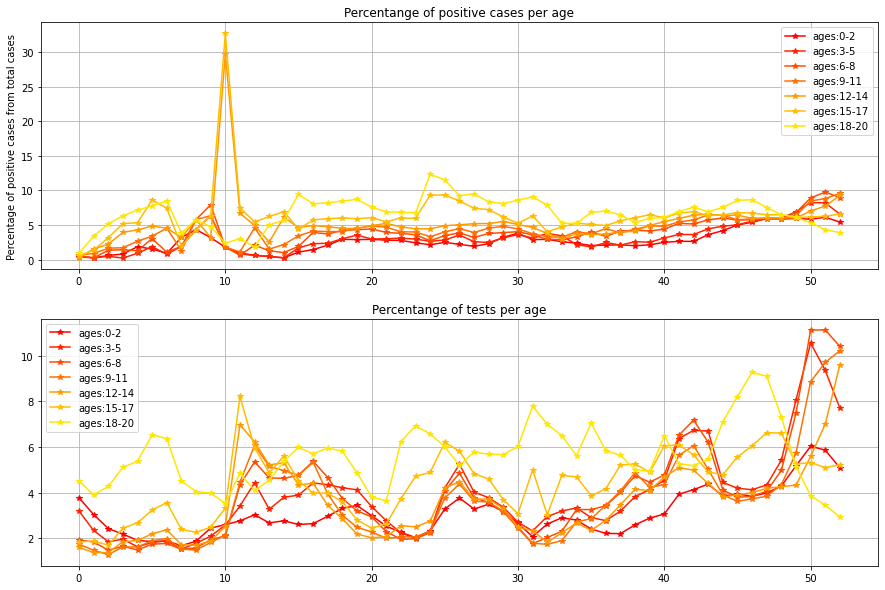

In [63]:
draw_per_total(young_test_data, test_data_agg_weeks, with_new=False, with_dead=False)

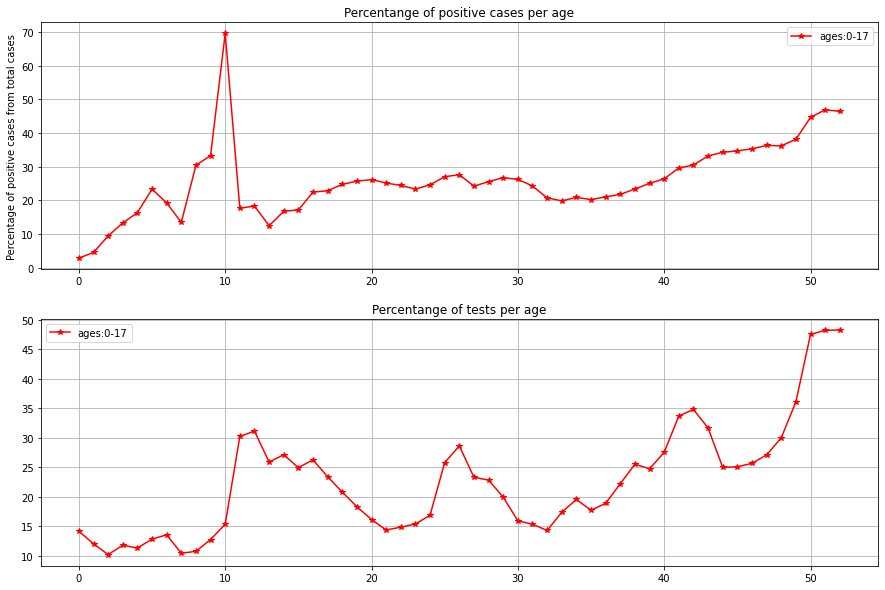

In [32]:
draw_per_total(young_data_tot, test_data_agg_weeks, with_new=False, with_dead=False)

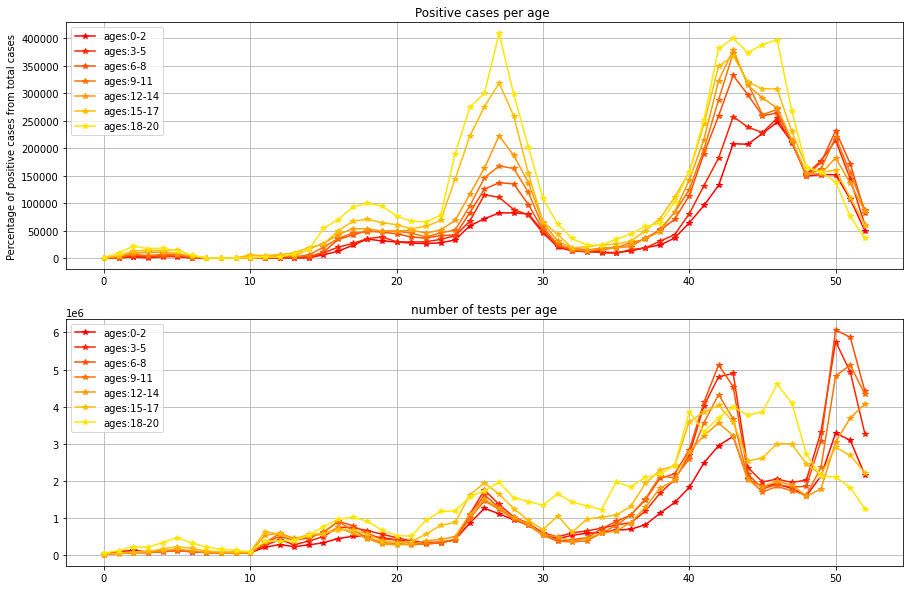

In [36]:
fig, ax = draw_absolute_numbers(young_test_data, with_dead=False)

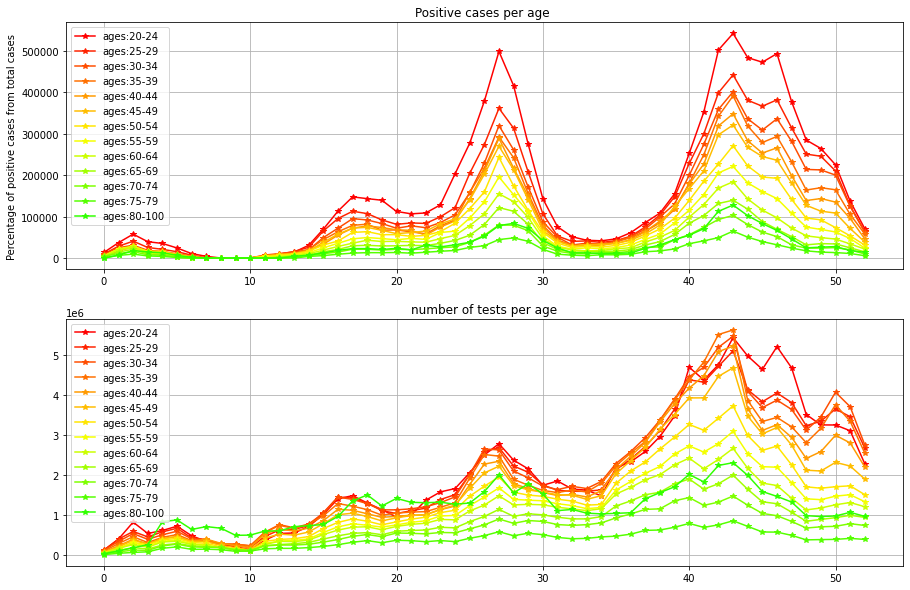

In [42]:
fig, ax = draw_absolute_numbers(age_gender_test_data_temp, with_dead=False)

(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Positive cases/max positive cases per age '}, ylabel='Percentage of positive cases from total cases'>,
        <AxesSubplot:title={'center':'number of tests/max tests per age'}>],
       dtype=object))

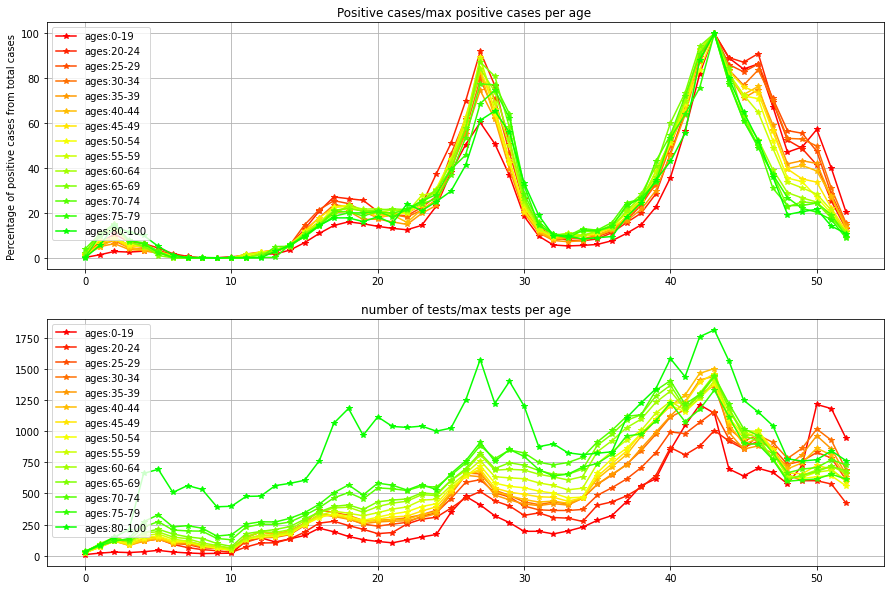

In [74]:
draw_per_max(age_gender_test_data, with_dead=False, with_new=False)

(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Positive cases/max positive cases per age '}, ylabel='Percentage of positive cases from total cases'>,
        <AxesSubplot:title={'center':'number of tests/max tests per age'}>],
       dtype=object))

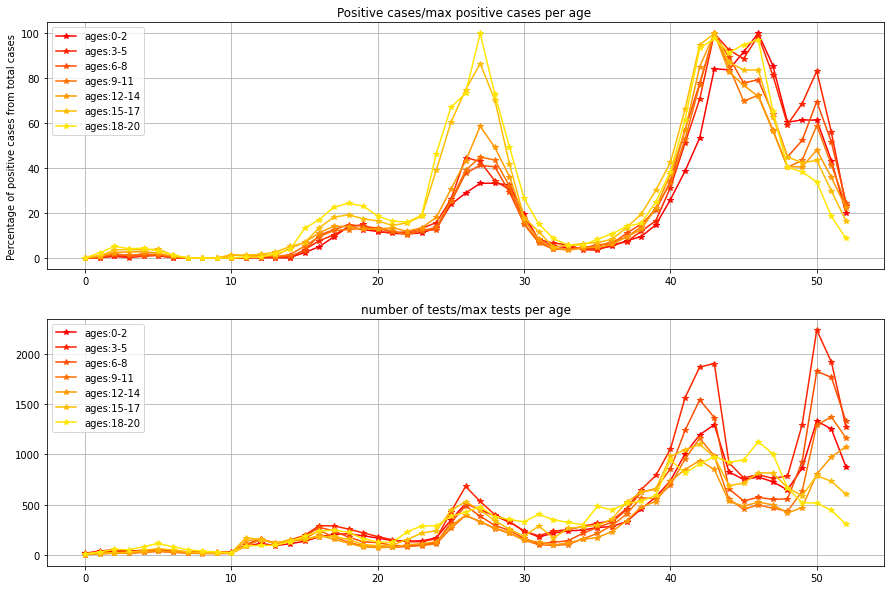

In [75]:
draw_per_max(young_test_data, with_dead=False, with_new=False)

In [81]:
agg_data_temp = all_testing_data.groupby(['min_age', 'max_age'], as_index = False).agg({'percentage_age': 'first', 
                                                                         'total_age_in_population': 'first', 
                                                                        'weeks_from': 'last', 
                                                                        'weekly_tests_num': 'sum', 
                                                                        'weekly_cases': 'sum'})
total_cases = np.sum(agg_data_temp.weekly_cases)

In [88]:
agg_data_temp['percentage_positive'] = np.round(100 * agg_data_temp.weekly_cases / total_cases, 3)

In [91]:
agg_data_temp[['min_age', 'max_age', 'percentage_positive']]

,min_age,max_age,percentage_positive
0,0.0,2,3.431
1,3.0,5,3.995
2,6.0,8,4.860
3,9.0,11,5.207
4,12.0,14,5.550
5,15.0,17,6.487
6,18.0,20,7.489
7,20.0,24,10.403
8,25.0,29,8.302
9,30.0,34,7.265
